In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pylab 

import seaborn as sns

all_genres = set()

In [2]:
movies = pd.read_csv('ml-1m/movies.dat', sep='::', names=['movie_id', 'title', 'genre'], engine='python')

In [3]:
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
for index, row in movies.iterrows():
    genres = row['genre'].split("|")
    for genre in genres:
        all_genres.add(genre)

In [5]:
print(len(all_genres))

18


In [6]:
all_movies = movies.title.unique()

In [7]:
from wordcloud import WordCloud

In [8]:
qwe = str(list(all_genres))
removeSpecialChars = qwe.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+'"})
print(removeSpecialChars)
genre_wordcloud = WordCloud(width=1000, height=1000).generate(removeSpecialChars)

Adventure Fantasy SciFi Comedy Crime Horror Western Musical Animation Thriller Romance Drama Mystery FilmNoir Action War "Childrens" Documentary


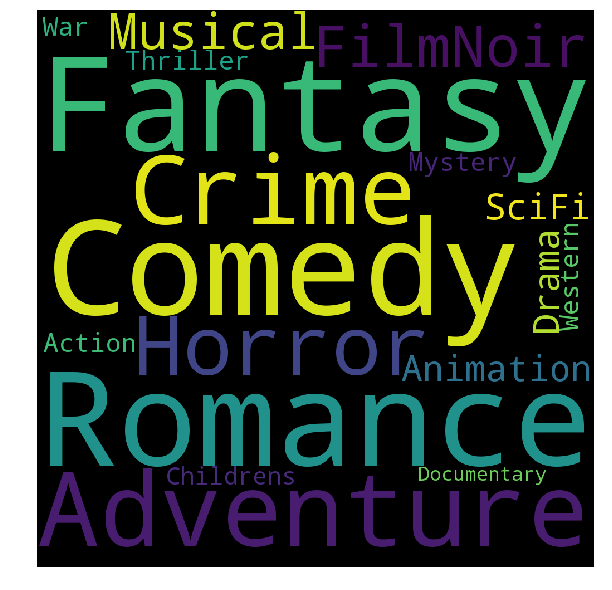

In [9]:
plt.figure( figsize=(10,8)) # , facecolor='k'
plt.imshow(genre_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [10]:
import re

all_movies = all_movies.tolist()


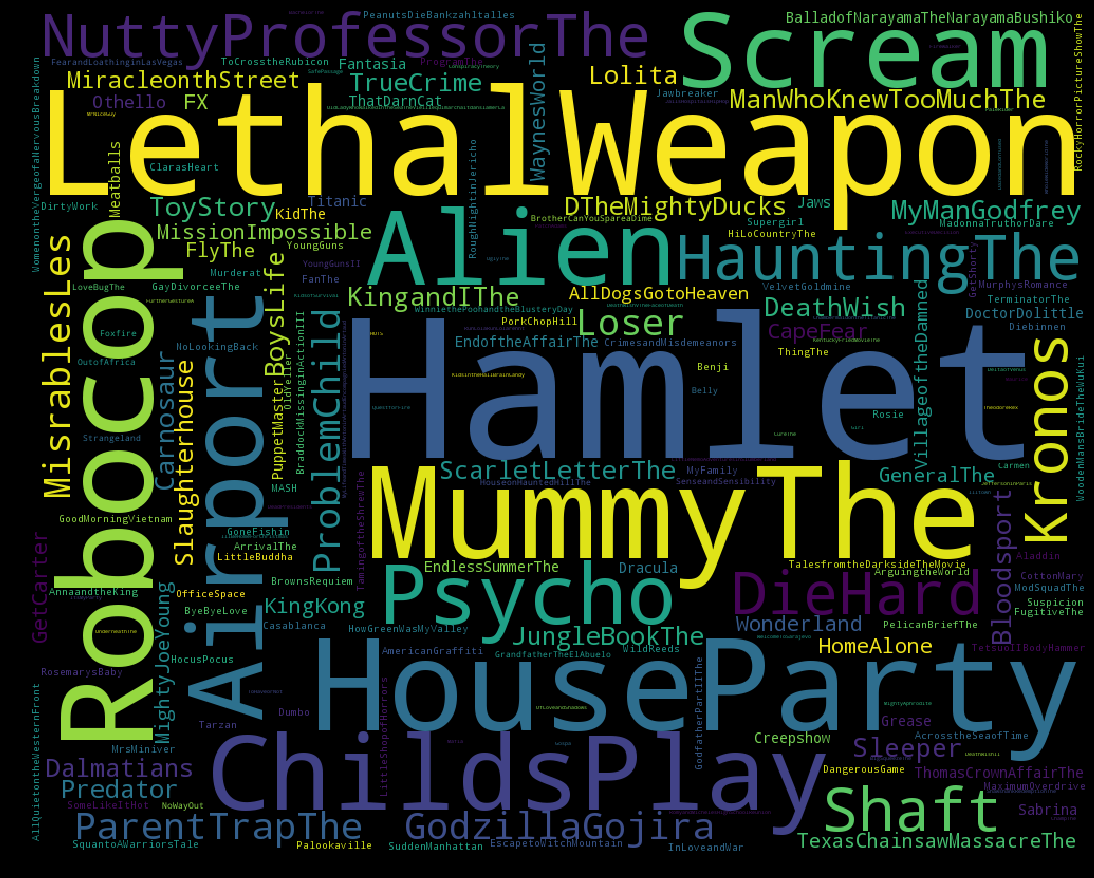

In [11]:
for i in range(len(all_movies)):       
    all_movies[i] = re.sub('[^A-Za-z]+', '', str(all_movies[i]))

qwe = str(all_movies)
removeSpecialChars = qwe.translate ({ord(c): "" for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+'"})
movie_wordcloud = WordCloud(width=1000, height=800).generate(removeSpecialChars)

plt.figure( figsize=(15,12), facecolor='k')
plt.imshow(movie_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')
indices = ratings.user_id.unique()
print(len(indices))
x_,_ = ratings.shape

6040


In [15]:
density = x_/(len(all_movies)*len(indices))
print("Data Density : ",density*100 ,"%")

Data Density :  4.264679797998748 %


In [16]:
sparsity = 1 - density
print("Data Sparsity : ",sparsity*100 ,"%")

Data Sparsity :  95.73532020200125 %
